In [10]:
dataset_path = "iris.csv"
random_seed = 10

In [11]:
# imports

from torch.nn import Linear, CrossEntropyLoss, Module
from torch.nn.functional import relu
from torch import manual_seed, float32, tensor, no_grad, long
from torch.optim import Adam
from numpy.random import seed as np_seed
from random import seed as r_seed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot, xlabel, ylabel, title, savefig, figure, show, grid

In [12]:
# pick a manual seed for randomisation
manual_seed(random_seed)
np_seed(random_seed)
r_seed(random_seed)

class Model(Module):
    def __init__(self, in_features=4, h1_layer=6, h2_layer=8, h3_layer=10, out_features=3, dtype=float32):
        super().__init__()
        self.fully_connected1 = Linear(in_features=in_features, out_features=h1_layer, dtype=dtype)
        self.fully_connected2 = Linear(in_features=h1_layer, out_features=h2_layer, dtype=dtype)
        self.fully_connected3 = Linear(in_features=h2_layer, out_features=h3_layer, dtype=dtype)
        self.output = Linear(in_features=h3_layer, out_features=out_features, dtype=dtype)

    def forward(self, x):
        x1 = relu(self.fully_connected1(x))
        x2 = relu(self.fully_connected2(x1))
        x3 = relu(self.fully_connected3(x2))
        x_out = relu(self.output(x3))

        return x_out

# Model
model = Model()

In [13]:
# Data Loading and spliting

df = read_csv(dataset_path)
species = df["species"].unique().tolist()

df.replace(
    {
        "species": {
            species[0]: 0.0,
            species[1]: 1.0,
            species[2]: 2.0,
        }
    },
    inplace=True,
)

X = df.drop("species", axis=1).to_numpy()
y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=random_seed
)

X_train = tensor(X_train, dtype=float32)
X_test = tensor(X_test, dtype=float32)

y_train = tensor(y_train, dtype=long)
y_test = tensor(y_test, dtype=long)

/tmp/ipykernel_766330/670290804.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(


In [14]:
# Parameter setup

loss_fn = CrossEntropyLoss()

learning_rate = 0.01
optimizer = Adam(params=model.parameters(), lr=learning_rate)

epoches = 500

In [15]:
# training loop
losses = []
model.train()

for i in range(epoches):
    # prediction
    y_pred = model(X_train)

    # Measure the loss
    loss = loss_fn(y_pred, y_train)  # predicted values vs y_train values

    # keep track of losses
    losses.append(loss.item())

    # back propogation with gredient dicent

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 50 == 0:
        print(f"epoch: {i}, loss: {loss:.10f}")


epoch: 0, loss: 1.1121772528
epoch: 50, loss: 0.6903339624
epoch: 100, loss: 0.1312968284
epoch: 150, loss: 0.0522787906
epoch: 200, loss: 0.0476930961
epoch: 250, loss: 0.0464739464
epoch: 300, loss: 0.0460155606
epoch: 350, loss: 0.0457210131
epoch: 400, loss: 0.0455601662
epoch: 450, loss: 0.0454421677


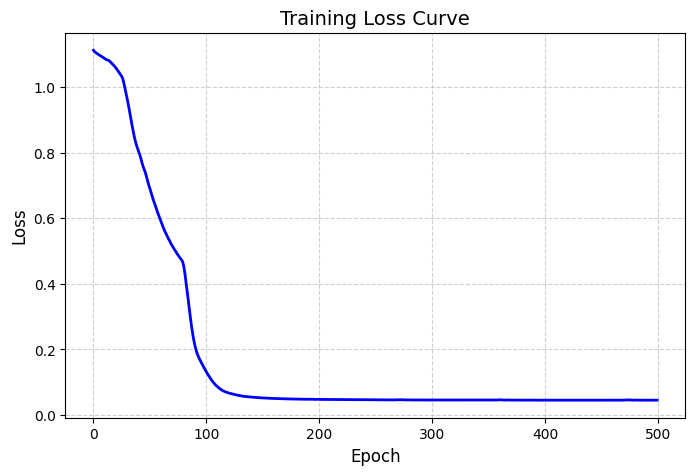

In [16]:
%matplotlib inline  

figure(figsize=(8, 5))
plot(range(len(losses)), losses, color='blue', linewidth=2)

title("Training Loss Curve", fontsize=14)
xlabel("Epoch", fontsize=12)
ylabel("Loss", fontsize=12)
grid(True, linestyle='--', alpha=0.6)

show()

In [17]:
# evaluation

with no_grad():
    correct = 0
    model.eval()
    for i in range(len(X_test)):
        sample = X_test[i]
        y_actual = y_test[i]

        y_pred_test = model.forward(sample)
        predicted = y_pred_test.argmax().item()
        loss = loss_fn(y_pred_test, y_actual)

        if predicted == y_actual:
            correct += 1

        print(
            f"y_actual: {y_actual.item()}, predicted: {predicted}, loss: {loss:10f}"
        )

    print(
        f"\n{correct} predictions are correct out of {len(y_test)}, accuracy is {(correct/len(y_test) * 100):.2f}%"
    )

y_actual: 1, predicted: 1, loss:   0.000895
y_actual: 2, predicted: 2, loss:   0.000623
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 1, predicted: 1, loss:   0.000545
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 1, predicted: 1, loss:   0.000253
y_actual: 1, predicted: 1, loss:   0.378353
y_actual: 1, predicted: 1, loss:   0.000341
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 1, predicted: 1, loss:   0.000425
y_actual: 1, predicted: 1, loss:   0.003075
y_actual: 2, predicted: 2, loss:   0.000933
y_actual: 1, predicted: 1, loss:   0.000175
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 2, predicted: 2, loss:   0.000080
y_actual: 1, predicted: 1, loss:   0.000500
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 0, predicted: 0, loss:   0.000562
y_actual: 2, predicted: 2, loss:   0.000005
y_actual: 2, predicted: 2, loss:   0.000002
y_actual: 2, predicted: 2, loss: